<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2004%20-%20Multistep%20Methods/4_Problem_Sheet/402a_Problem_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Sheet Question 2a

The general form of the population growth differential equation
\begin{equation} y^{'}=y-t, \ \ (0 \leq t \leq 2) \end{equation}
with the initial condition
\begin{equation}y(0)=2.\end{equation}
For N=4
with the analytic (exact) solution
\begin{equation} y= e^{t}+t+1.\end{equation}

# 2-step Adams Moulton
The 3-step Adams Bashforth difference equation is
\begin{equation}w_{i+1} = w_{i} + \frac{h}{12}(5f(t_{i+1},w_{i+1})+8f(t_i,w_i)-f(t_{i-1},w_{i-1})) \end{equation}
where
\begin{equation}w_{i+1} = w_{i} + \frac{h}{12}(5(w_{i+1}-t_{i+1})+8(w_i-t_i)-(w_{i-1}-t_{i-1})). \end{equation}
Re-arranging
\begin{equation}w_{i+1}-\frac{5h}{12}w_{i+1} = w_{i} + \frac{h}{12}(5(-t_{i+1})+8(w_i-t_i)-(w_{i-1}-t_{i-1})). \end{equation}
\begin{equation}w_{i+1} =\frac{ w_{i} + \frac{h}{12}(5(-t_{i+1})+8(w_i-t_i)-(w_{i-1}-t_{i-1}))}{1-\frac{5h}{12}}. \end{equation}


In [3]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


In [22]:
def myfun_ty(t,y):
    return y-t



#PLOTS
def Adams_Moulton_2step(N,IC):

    x_end=2
    x_start=0
    INTITIAL_CONDITION=IC
    h=x_end/(N)
    t=np.arange(x_start,x_end+h/2,h)
    w=np.zeros(N+1)
   
    k=0
    w[0]=INTITIAL_CONDITION
    w[1]=math.exp(t[1])+t[1]+1
    Analytic_Solution=np.exp(t)+t+1

    for k in range (1,N):
        w[k+1]=(w[k]+h/12.0*(-5*t[k+1]+8*myfun_ty(t[k],w[k])-myfun_ty(t[k-1],w[k-1])))/(1-5*h/12)

    fig = plt.figure(figsize=(10,4))
    # --- left hand plot
    ax = fig.add_subplot(1,3,1)
    plt.plot(t,w,'o:',color='blue')
    #ax.legend(loc='best')
    plt.title('Numerical Solution h=%s'%(h))

    # --- right hand plot
    ax = fig.add_subplot(1,3,2)
    plt.plot(t,Analytic_Solution,color='black')
    plt.title('Analytic Solution')

   
    ax = fig.add_subplot(1,3,3)
    plt.plot(t,Analytic_Solution-w,'o:',color='red')
    plt.title('Error')
 # --- title, explanatory text and save



    # --- title, explanatory text and save
    fig.suptitle(r"$y'=t-y$", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)      
    print(t)
    print(Analytic_Solution)
    print(w)

[0.  0.5 1.  1.5 2. ]
[ 2.          3.14872127  4.71828183  6.98168907 10.3890561 ]
[ 2.          3.14872127  4.72416214  7.00128775 10.43773925]


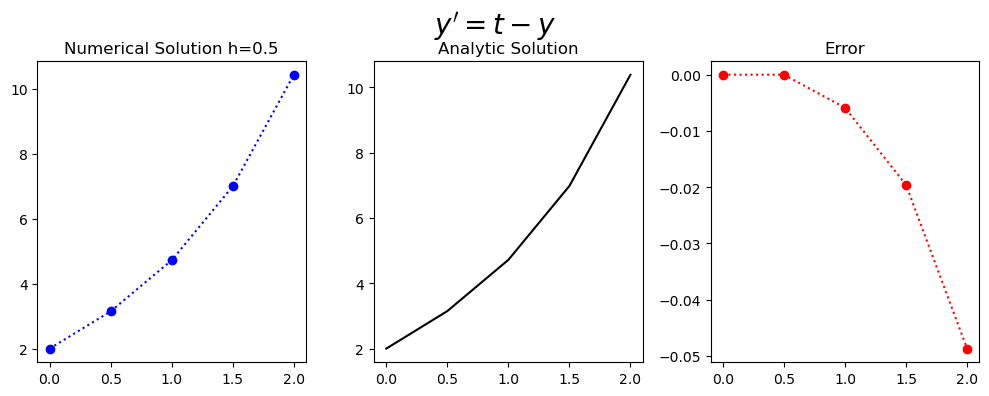

In [23]:
Adams_Moulton_2step(4,2)